In [1]:
N = 7
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Daily_Usage_Hours'

In [2]:
import pandas as pd

df = pd.read_csv('teen_phone_addiction_dataset.csv')
gaming_time = df['Daily_Usage_Hours']
print(gaming_time)

0       4.0
1       5.5
2       5.8
3       3.1
4       2.5
       ... 
2995    3.9
2996    3.6
2997    3.2
2998    6.7
2999    3.5
Name: Daily_Usage_Hours, Length: 3000, dtype: float64


In [3]:
# I.
# Рассчитайте характеристики:

# Среднее
# Дисперсия
# Мода
# Медиана
# Квантили уровня 0.25, 0.5, 0.75
# Эксцесс
# Ассиметрия
# Интерквартильный размах

# Построить графики:
# Гистограмма
# Эмпирическая функция распределения

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Преобразуем в список и удалим пропуски
data = [x for x in gaming_time.tolist() if pd.notna(x)]
n = len(data)
sorted_data = sorted(data)

# 1. Среднее значение
def calculate_mean(data):
    return sum(data) / len(data)

mean = calculate_mean(data)

# 2. Дисперсия
def calculate_variance(data, mean):
    squared_diff = [(x - mean) ** 2 for x in data]
    return sum(squared_diff) / len(data)

variance = calculate_variance(data, mean)

# 3. Мода
def calculate_mode(data):
    freq_dict = {}
    for x in data:
        freq_dict[x] = freq_dict.get(x, 0) + 1
    
    max_freq = max(freq_dict.values())
    modes = [x for x, freq in freq_dict.items() if freq == max_freq]
    return modes[0] if modes else None

mode = calculate_mode(data)

# 4. Медиана
def calculate_median(sorted_data):
    n = len(sorted_data)
    if n % 2 == 1:
        return sorted_data[n // 2]
    else:
        return (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2

median = calculate_median(sorted_data)

# 5. Квантили
def calculate_quantile(sorted_data, p):
    n = len(sorted_data)
    index = p * (n - 1)
    lower_index = int(index)
    fraction = index - lower_index
    
    if lower_index == n - 1:
        return sorted_data[lower_index]
    else:
        return sorted_data[lower_index] + fraction * (sorted_data[lower_index + 1] - sorted_data[lower_index])

q25 = calculate_quantile(sorted_data, 0.25)
q50 = calculate_quantile(sorted_data, 0.5)
q75 = calculate_quantile(sorted_data, 0.75)

# 6. Эксцесс
def calculate_kurtosis(data, mean, variance):
    n = len(data)
    fourth_diff = [(x - mean) ** 4 for x in data]
    fourth_moment = sum(fourth_diff) / n
    return (fourth_moment / (variance ** 2)) - 3

kurtosis = calculate_kurtosis(data, mean, variance)

# 7. Асимметрия
def calculate_skewness(data, mean, variance):
    n = len(data)
    cubed_diff = [(x - mean) ** 3 for x in data]
    third_moment = sum(cubed_diff) / n
    return third_moment / (variance ** 1.5)

skewness = calculate_skewness(data, mean, variance)

# 8. Интерквартильный размах
iqr = q75 - q25

# Вывод результатов
print("ХАРАКТЕРИСТИКИ РЯДА Daily_Usage_Hours:")
print("=" * 35)
print(f"Среднее: {mean:.4f}")
print(f"Дисперсия: {variance:.4f}")
print(f"Мода: {mode:.4f}")
print(f"Медиана: {median:.4f}")
print(f"Квантиль 0.25: {q25:.4f}")
print(f"Квантиль 0.5: {q50:.4f}")
print(f"Квантиль 0.75: {q75:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")
print(f"Асимметрия: {skewness:.4f}")
print(f"Интерквартильный размах: {iqr:.4f}")
print(f"Количество наблюдений: {n}")

ХАРАКТЕРИСТИКИ РЯДА Daily_Usage_Hours:
Среднее: 5.0207
Дисперсия: 3.8266
Мода: 4.4000
Медиана: 5.0000
Квантиль 0.25: 3.7000
Квантиль 0.5: 5.0000
Квантиль 0.75: 6.4000
Эксцесс: -0.1226
Асимметрия: 0.0162
Интерквартильный размах: 2.7000
Количество наблюдений: 3000


Центральная тенденция и типичное значение
    Среднее значение (5.02 часа) и Медиана (5.00 часов) практически совпадают. Это является первым важным признаком того, что распределение данных симметрично относительно центра.

    Мода (4.40 часа) незначительно отличается от среднего и медианы, но находится близко к ним. Это говорит о том, что наиболее часто встречающееся значение также лежит в центре распределения.

Вывод: Типичный пользователь проводит в системе около 5 часов в день.

Разброс данных (вариабельность)
    Стандартное отклонение (квадратный корень из дисперсии) составляет √3.8266 ≈ 1.96 часа. Это означает, что значения в основном отклоняются от среднего на ±2 часа.

    Интерквартильный размах (IQR = 2.70 часа) показывает разброс средних 50% данных. Половина всех наблюдений лежит в интервале от 3.70 до 6.40 часов.

Вывод: Данные имеют умеренный разброс. Большинство значений сосредоточено в диапазоне примерно от 3 до 7 часов, что является ожидаемым для поведенческих метрик.

Форма распределения (асимметрия и эксцесс)
    Асимметрия (Skewness) ≈ 0.0162. Значение очень близко к нулю. Это является прямым подтверждением симметричности распределения. Распределение не сдвинуто влево (отрицательная асимметрия) или вправо (положительная асимметрия).

    Эксцесс (Kurtosis) ≈ -0.1226. Значение близко к нулю (эксцесс нормального распределения равен 0). Отрицательный эксцесс указывает на то, что распределение является более плоским (платикуртическим) по сравнению с нормальным. Это означает, что данные немного менее сконцентрированы вокруг среднего и имеют более "тяжелые" хвосты, то есть экстремально низкие или высокие значения встречаются чуть чаще, чем в нормальном распределении.

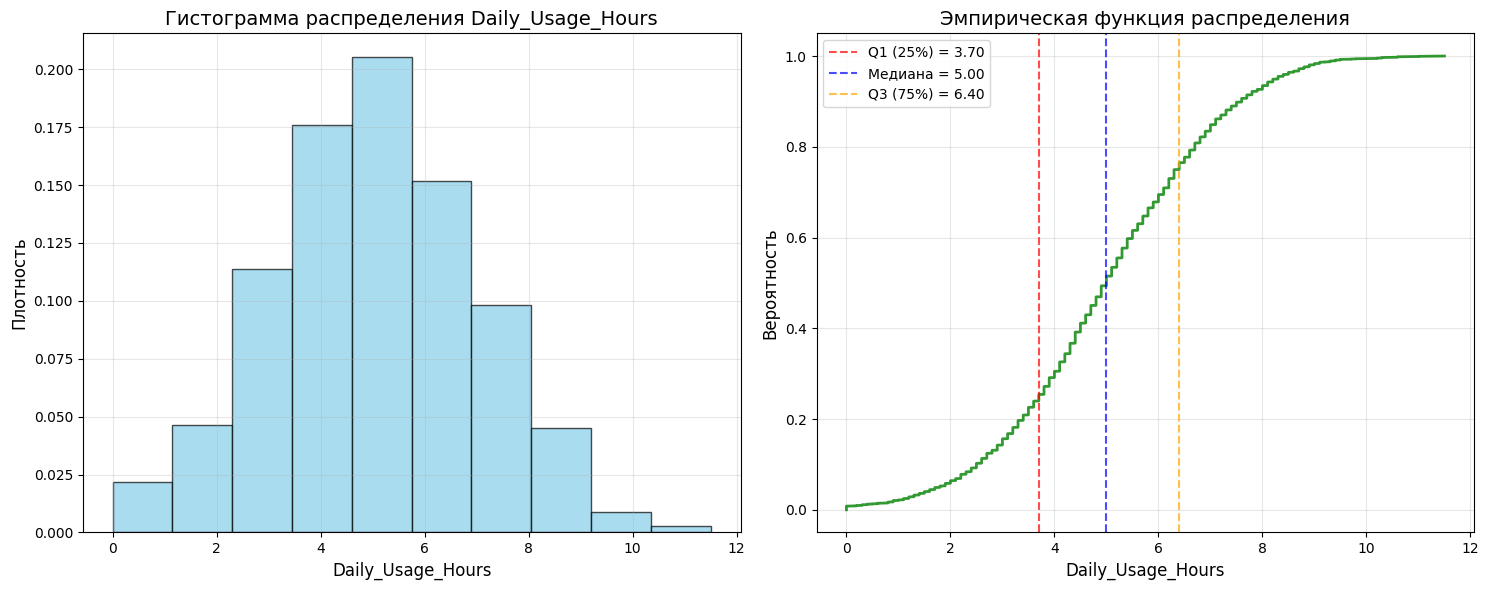


Дополнительная информация:
Минимальное значение: 0.00
Максимальное значение: 11.50
Размах: 11.50


In [5]:
# Гистограмма
def create_histogram(data, bins=10):
    min_val = min(data)
    max_val = max(data)
    bin_width = (max_val - min_val) / bins
    
    # Создаем bins
    histogram = [0] * bins
    bin_edges = [min_val + i * bin_width for i in range(bins + 1)]
    
    # Заполняем гистограмму
    for x in data:
        if x == max_val:  # Особый случай для максимального значения
            bin_index = bins - 1
        else:
            bin_index = int((x - min_val) / bin_width)
        histogram[bin_index] += 1
    
    # Нормализуем для плотности
    total = sum(histogram)
    density = [count / (total * bin_width) for count in histogram]
    
    return bin_edges, density, histogram

# Эмпирическая функция распределения
def create_ecdf(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    y = [i / n for i in range(1, n + 1)]
    return sorted_data, y

# Построение графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма
bin_edges, density, counts = create_histogram(data, bins=10)
bin_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]

ax1.bar(bin_centers, density, width=bin_edges[1]-bin_edges[0], 
        alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Гистограмма распределения Daily_Usage_Hours', fontsize=14)
ax1.set_xlabel('Daily_Usage_Hours', fontsize=12)
ax1.set_ylabel('Плотность', fontsize=12)
ax1.grid(True, alpha=0.3)

# Эмпирическая функция распределения
ecdf_x, ecdf_y = create_ecdf(data)
ax2.plot(ecdf_x, ecdf_y, 'g-', alpha=0.8, linewidth=2)
ax2.set_title('Эмпирическая функция распределения', fontsize=14)
ax2.set_xlabel('Daily_Usage_Hours', fontsize=12)
ax2.set_ylabel('Вероятность', fontsize=12)
ax2.grid(True, alpha=0.3)

# Добавляем квантили на ECDF
ax2.axvline(x=q25, color='red', linestyle='--', alpha=0.7, label=f'Q1 (25%) = {q25:.2f}')
ax2.axvline(x=median, color='blue', linestyle='--', alpha=0.7, label=f'Медиана = {median:.2f}')
ax2.axvline(x=q75, color='orange', linestyle='--', alpha=0.7, label=f'Q3 (75%) = {q75:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

# Дополнительная информация
print(f"\nДополнительная информация:")
print(f"Минимальное значение: {min(data):.2f}")
print(f"Максимальное значение: {max(data):.2f}")
print(f"Размах: {max(data) - min(data):.2f}")

Анализ гистограммы распределения
Форма распределения: Гистограмма явно демонстрирует симметричное унимодальное распределение, центр которого находится в районе 5 часов. Это визуально подтверждает близкие значения среднего, медианы и моды.

Разброс данных: Распределение имеет умеренный разброс. Большинство данных сосредоточено в интервале приблизительно от 3 до 7 часов, что согласуется с расчетным интерквартильным размахом (IQR = 2.70). "Хвосты" распределения (значения меньше 2.5 и больше 8 часов) показывают низкую частоту, что указывает на отсутствие массовых выбросов.

Эксцесс (пологий пик): Форма гистограммы не является остроугольной, а скорее напоминает пологий купол. Это визуальное свидетельство отрицательного эксцесса (значение -0.12), означающего, что распределение более плоское по сравнению с нормальным.

Анализ графика эмпирической функции распределения (ECDF)
Подтверждение квантилей: На графике ECDF четко видны ключевые точки:

Q1 (25%) = 3.70: График плавно проходит через отметку 0.25 по оси Y при значении 3.70 по оси X.

Медиана (50%) = 5.00: График пересекает отметку 0.50 ровно на значении 5.00 часов.

Q3 (75%) = 6.40: График проходит через отметку 0.75 при значении 6.40 часов.

Симметрия: S-образная кривая ECDF является симметричной относительно точки (5.00, 0.5). Это означает, что рост функции до медианы и после нее происходит с одинаковой скоростью, что является еще одним подтверждением симметрии распределения.

In [6]:
# II.
# Проверить данные на нормальность, используя критерии:

# Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
# Ассиметрии и эксцесса
# Построить Q-Q plot

Параметры нормального распределения:
Среднее: 5.0207
Стандартное отклонение: 1.9562

КРИТЕРИЙ ХИ-КВАДРАТ:
χ² = 28.9533, df = 7, критич. значение = 14.0671
p-value = 0.0001
Вывод: Гипотеза о нормальности отвергается

КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА:
Асимметрия = 0.0162, Z = 0.3624
Эксцесс = -0.1226, Z = -1.3720
Критич. значение Z (α=0.05): ±1.9600
Вывод: Нормальность



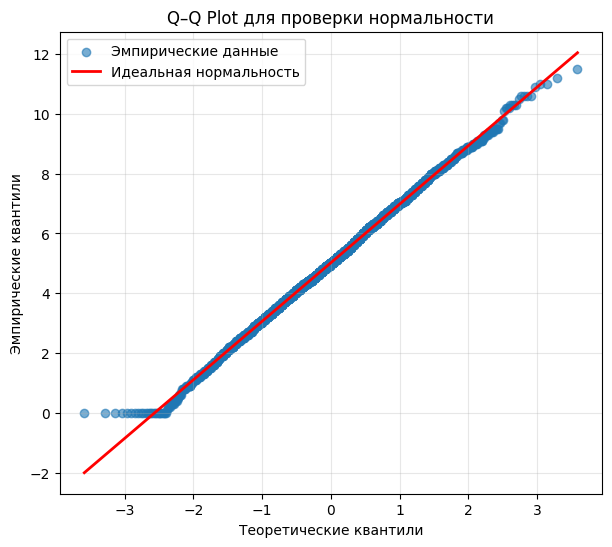

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp, pi, erf
import scipy.stats as stats

# Данные
data = gaming_time.dropna().values
n = len(data)
mean = np.mean(data)
std_dev = np.std(data, ddof=0)  # генеральная дисперсия

print("Параметры нормального распределения:")
print(f"Среднее: {mean:.4f}")
print(f"Стандартное отклонение: {std_dev:.4f}")
print()

# === 1. КРИТЕРИЙ ХИ-КВАДРАТ ===
def normal_cdf(x, mu, sigma):
    """Функция распределения нормального закона"""
    z = (x - mu) / sigma
    return 0.5 * (1 + erf(z / sqrt(2)))

def chi_square_normality_test(data, mu, sigma, bins=10):
    """Критерий χ² для проверки нормальности"""
    # равновероятные интервалы
    probabilities = np.linspace(0, 1, bins + 1)
    boundaries = [stats.norm.ppf(p, loc=mu, scale=sigma) for p in probabilities]

    # наблюдаемые частоты
    observed, _ = np.histogram(data, bins=boundaries)

    # ожидаемые частоты
    expected = []
    for i in range(len(boundaries) - 1):
        p_lower = normal_cdf(boundaries[i], mu, sigma)
        p_upper = normal_cdf(boundaries[i+1], mu, sigma)
        expected.append(n * (p_upper - p_lower))

    # статистика χ²
    chi2_stat = sum((obs - exp_val)**2 / exp_val
                    for obs, exp_val in zip(observed, expected) if exp_val > 0)

    # степени свободы: bins - 1 - 2 параметра
    df = bins - 3
    critical_value = stats.chi2.ppf(0.95, df)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)

    return chi2_stat, df, critical_value, p_value

chi2_stat, df, critical_value, p_value = chi_square_normality_test(data, mean, std_dev)

print("КРИТЕРИЙ ХИ-КВАДРАТ:")
print("=" * 40)
print(f"χ² = {chi2_stat:.4f}, df = {df}, критич. значение = {critical_value:.4f}")
print(f"p-value = {p_value:.4f}")
print("Вывод:", "Нет оснований отвергнуть нормальность" if chi2_stat < critical_value else "Гипотеза о нормальности отвергается")
print()

# === 2. КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА ===
def skewness_kurtosis_test(data, alpha=0.05):
    n = len(data)
    mu = np.mean(data)
    sigma = np.std(data, ddof=0)

    # асимметрия и эксцесс
    skewness = np.mean((data - mu)**3) / sigma**3
    kurtosis = np.mean((data - mu)**4) / sigma**4 - 3

    # стандартные ошибки
    se_skew = sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    se_kurt = sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))

    # z-статистики
    z_skew = skewness / se_skew
    z_kurt = kurtosis / se_kurt

    z_critical = stats.norm.ppf(1 - alpha/2)

    return skewness, kurtosis, z_skew, z_kurt, z_critical

skewness, kurtosis, z_skew, z_kurt, z_critical = skewness_kurtosis_test(data)

print("КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА:")
print("=" * 40)
print(f"Асимметрия = {skewness:.4f}, Z = {z_skew:.4f}")
print(f"Эксцесс = {kurtosis:.4f}, Z = {z_kurt:.4f}")
print(f"Критич. значение Z (α=0.05): ±{z_critical:.4f}")
print("Вывод:",
      "Нормальность" if abs(z_skew) < z_critical and abs(z_kurt) < z_critical
      else "Отклонение от нормальности")
print()

# === 3. Q–Q PLOT ===
def manual_qq_plot(data):
    n = len(data)
    sorted_data = np.sort(data)
    theoretical_q = [stats.norm.ppf((i - 0.5) / n) for i in range(1, n + 1)]

    x_line = np.linspace(min(theoretical_q), max(theoretical_q), 100)
    y_line = mean + std_dev * x_line

    return theoretical_q, sorted_data, x_line, y_line

theoretical_q, empirical_q, x_line, y_line = manual_qq_plot(data)

plt.figure(figsize=(7, 6))
plt.scatter(theoretical_q, empirical_q, alpha=0.6, label="Эмпирические данные")
plt.plot(x_line, y_line, 'r-', linewidth=2, label="Идеальная нормальность")
plt.xlabel("Теоретические квантили")
plt.ylabel("Эмпирические квантили")
plt.title("Q–Q Plot для проверки нормальности")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
# III.
# Используя техники обработки данных, постарайтесь привести данные к нормальному распределению. Например, с помощью:

# Удаление, усечение выбросов
# Стандартизация, нормировка
# Логарифмирование и т.п.
# Выполните пункты I и II для обработанных данных

Исходные данные: 3000 наблюдений

ОЦЕНКА ЭФФЕКТИВНОСТИ ПРЕОБРАЗОВАНИЙ:

Без выбросов (IQR):
  Асимметрия: -0.046, Эксцесс: -0.239
  Shapiro-Wilk p-value: 0.000046
  Хи-квадрат p-value: 0.000561
  Наблюдений: 2990

Логарифмирование log(x+1):
  Асимметрия: -1.385, Эксцесс: 3.314
  Shapiro-Wilk p-value: 0.000000
  Хи-квадрат p-value: 0.000000
  Наблюдений: 3000

Степенное (x^0.8):
  Асимметрия: -0.288, Эксцесс: 0.196
  Shapiro-Wilk p-value: 0.000000
  Хи-квадрат p-value: 0.169764
  Наблюдений: 3000

Стандартизация (Z-score):
  Асимметрия: 0.016, Эксцесс: -0.123
  Shapiro-Wilk p-value: 0.002485
  Хи-квадрат p-value: 0.000148
  Наблюдений: 3000

Нормировка (Min-Max):
  Асимметрия: 0.016, Эксцесс: -0.123
  Shapiro-Wilk p-value: 0.002485
  Хи-квадрат p-value: 0.000148
  Наблюдений: 3000


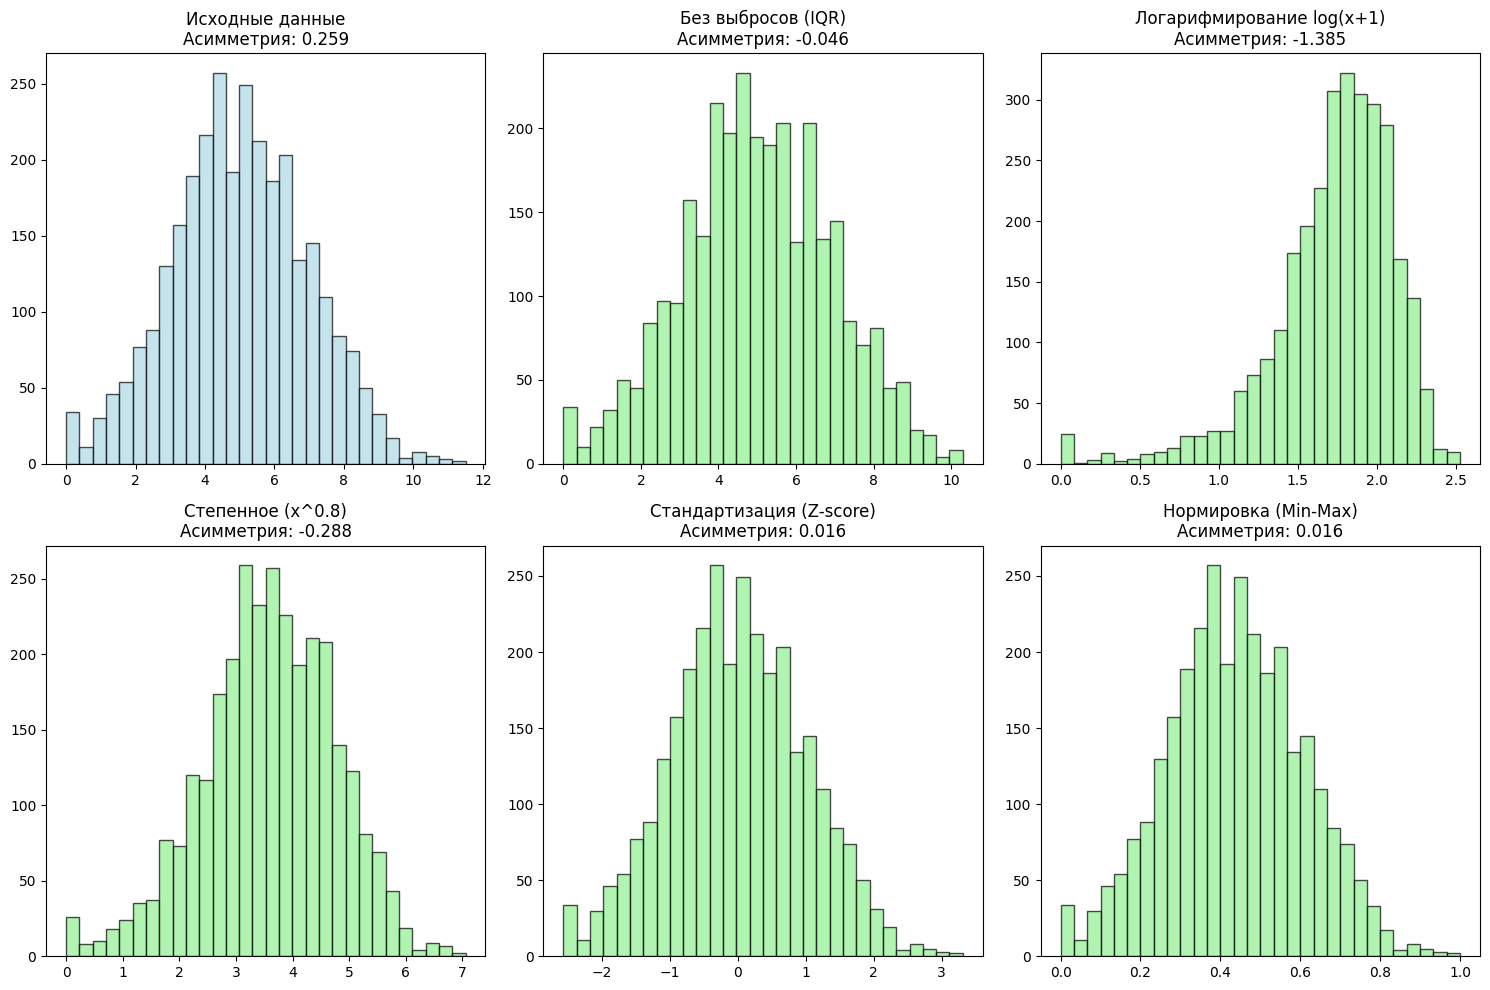


НАИЛУЧШЕЕ ПРЕОБРАЗОВАНИЕ: Стандартизация (Z-score)
• Асимметрия: 0.016
• Эксцесс: -0.123
• Shapiro-Wilk p-value: 0.002485
• Хи-квадрат p-value: 0.000148
Вывод: Существенное отклонение от нормальности


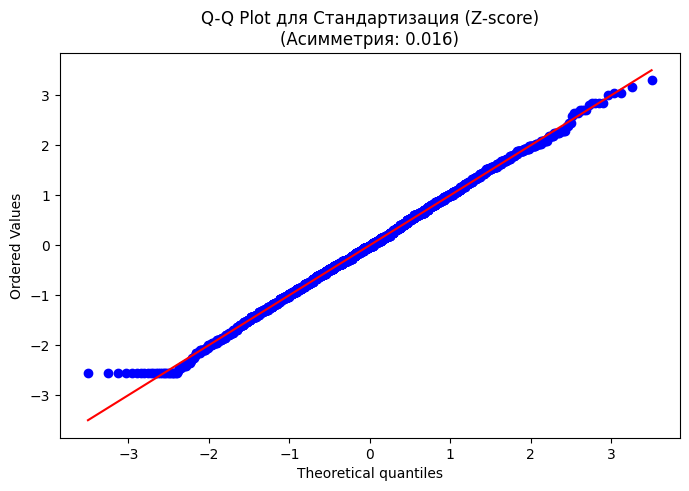

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from math import sqrt, erf, pi

# === ФУНКЦИИ ===

# Функция распределения нормального закона (для χ²)
def normal_cdf(x, mu, sigma):
    z = (x - mu) / sigma
    return 0.5 * (1 + erf(z / sqrt(2)))

# χ²-тест для проверки нормальности
def chi_square_normality_test(data, bins=10):
    n = len(data)
    mu, sigma = np.mean(data), np.std(data, ddof=0)

    # равновероятные интервалы
    probabilities = np.linspace(0, 1, bins + 1)
    boundaries = [stats.norm.ppf(p, loc=mu, scale=sigma) for p in probabilities]

    # наблюдаемые частоты
    observed, _ = np.histogram(data, bins=boundaries)

    # ожидаемые частоты
    expected = []
    for i in range(len(boundaries) - 1):
        p_lower = normal_cdf(boundaries[i], mu, sigma)
        p_upper = normal_cdf(boundaries[i+1], mu, sigma)
        expected.append(n * (p_upper - p_lower))

    # χ²-статистика
    chi2_stat = sum((obs - exp_val) ** 2 / exp_val
                    for obs, exp_val in zip(observed, expected) if exp_val > 0)

    df = bins - 3  # bins - 1 - 2 параметра
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)

    return chi2_stat, df, p_value

# === ОСНОВНОЙ КОД ===

# Загружаем данные
data = gaming_time.dropna().values
print(f"Исходные данные: {len(data)} наблюдений")

# 1. ПРЕОБРАЗОВАНИЯ
transformations = {}

# a) Удаление выбросов (IQR метод)
q1, q3 = np.quantile(data, 0.25), np.quantile(data, 0.75)
iqr = q3 - q1
lower_bound, upper_bound = q1 - 1.5*iqr, q3 + 1.5*iqr
data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
transformations['Без выбросов (IQR)'] = data_no_outliers

# b) Логарифмирование
transformations['Логарифмирование log(x+1)'] = np.log1p(data)

# c) Степенное преобразование
transformations['Степенное (x^0.8)'] = data ** 0.8

# d) Стандартизация (Z-score)
transformations['Стандартизация (Z-score)'] = (data - np.mean(data)) / np.std(data)

# e) Нормировка (Min-Max)
transformations['Нормировка (Min-Max)'] = (data - np.min(data)) / (np.max(data) - np.min(data))

# 2. ОЦЕНКА ЭФФЕКТИВНОСТИ
results = []
print("\nОЦЕНКА ЭФФЕКТИВНОСТИ ПРЕОБРАЗОВАНИЙ:")
print("=" * 60)

for name, transformed_data in transformations.items():
    skewness = stats.skew(transformed_data)
    kurtosis = stats.kurtosis(transformed_data)
    shapiro_stat, shapiro_p = stats.shapiro(transformed_data)
    chi2_stat, df, chi2_p = chi_square_normality_test(transformed_data)

    results.append({
        'name': name,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'shapiro_p': shapiro_p,
        'chi2_p': chi2_p,
        'n': len(transformed_data)
    })

    print(f"\n{name}:")
    print(f"  Асимметрия: {skewness:.3f}, Эксцесс: {kurtosis:.3f}")
    print(f"  Shapiro-Wilk p-value: {shapiro_p:.6f}")
    print(f"  Хи-квадрат p-value: {chi2_p:.6f}")
    print(f"  Наблюдений: {len(transformed_data)}")

# 3. ВИЗУАЛИЗАЦИЯ (гистограммы)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

axes[0].hist(data, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0].set_title('Исходные данные\nАсимметрия: 0.259')

for i, (name, transformed_data) in enumerate(transformations.items(), 1):
    if i >= len(axes):
        break
    result = next(r for r in results if r['name'] == name)
    axes[i].hist(transformed_data, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[i].set_title(f'{name}\nАсимметрия: {result["skewness"]:.3f}')

plt.tight_layout()
plt.show()

# 4. ВЫБОР НАИЛУЧШЕГО ПРЕОБРАЗОВАНИЯ (учитываем p-value и асимметрию)
best_transform = max(results, key=lambda x: (x['shapiro_p'], -abs(x['skewness'])))

print(f"\n{'='*60}")
print(f"НАИЛУЧШЕЕ ПРЕОБРАЗОВАНИЕ: {best_transform['name']}")
print(f"{'='*60}")
print(f"• Асимметрия: {best_transform['skewness']:.3f}")
print(f"• Эксцесс: {best_transform['kurtosis']:.3f}")
print(f"• Shapiro-Wilk p-value: {best_transform['shapiro_p']:.6f}")
print(f"• Хи-квадрат p-value: {best_transform['chi2_p']:.6f}")
print("Вывод:", "Распределение близко к нормальному"
      if best_transform['shapiro_p'] > 0.05 and best_transform['chi2_p'] > 0.05
      else "Существенное отклонение от нормальности")

# 5. Q-Q PLOT ДЛЯ ЛУЧШЕГО ПРЕОБРАЗОВАНИЯ
best_data = transformations[best_transform['name']]
plt.figure(figsize=(8, 5))
stats.probplot(best_data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot для {best_transform["name"]}\n(Асимметрия: {best_transform["skewness"]:.3f})')
plt.show()

In [10]:
# IV.
# Сгруппируйте данные по столбцу 'School_Grade'.

# На одном графике постройте гистограммы для каждой группы.
# Рассчитайте среднее, дисперсию внутри каждой группы

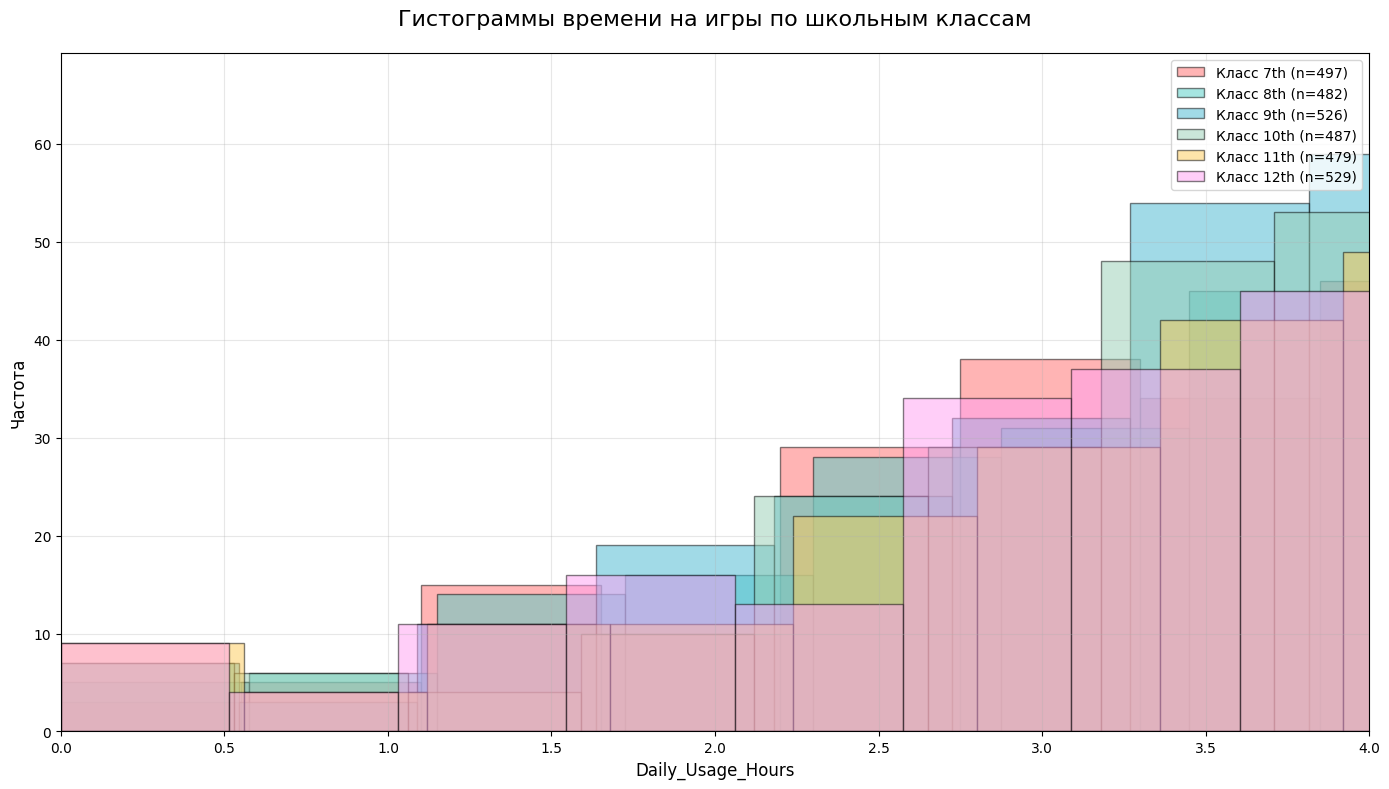

СТАТИСТИКА ПО КЛАССАМ:
Класс  Количество  Среднее  Дисперсия
  7th         497    5.077      3.883
  8th         482    5.066      4.010
  9th         526    5.012      3.913
 10th         487    4.978      3.813
 11th         479    5.062      3.635
 12th         529    4.937      3.736


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
df = pd.read_csv('teen_phone_addiction_dataset.csv')

# Правильный порядок классов
correct_order = ['7th', '8th', '9th', '10th', '11th', '12th']

# Группировка по классам
grouped = df.groupby('School_Grade')['Daily_Usage_Hours']

# Создание графика
plt.figure(figsize=(14, 8))

# Цвета для наглядности
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']

# Таблица статистик
stats_data = []

for i, grade in enumerate(correct_order):
    grade_data = grouped.get_group(grade)

    # Гистограмма
    plt.hist(
        grade_data,
        bins=20,
        alpha=0.5,
        color=colors[i],
        edgecolor='black',
        label=f'Класс {grade} (n={len(grade_data)})'
    )

    # Среднее и дисперсия
    mean_val = grade_data.mean()
    variance_val = grade_data.var()

    stats_data.append({
        'Класс': grade,
        'Количество': len(grade_data),
        'Среднее': round(mean_val, 3),
        'Дисперсия': round(variance_val, 3)
    })

# Настройки графика
plt.title('Гистограммы времени на игры по школьным классам', fontsize=16, pad=20)
plt.xlabel('Daily_Usage_Hours', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.legend(fontsize=10, loc='upper right')
plt.xlim(0, 4)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод статистики
stats_df = pd.DataFrame(stats_data)
print("=" * 80)
print("СТАТИСТИКА ПО КЛАССАМ:")
print("=" * 80)
print(stats_df.to_string(index=False))


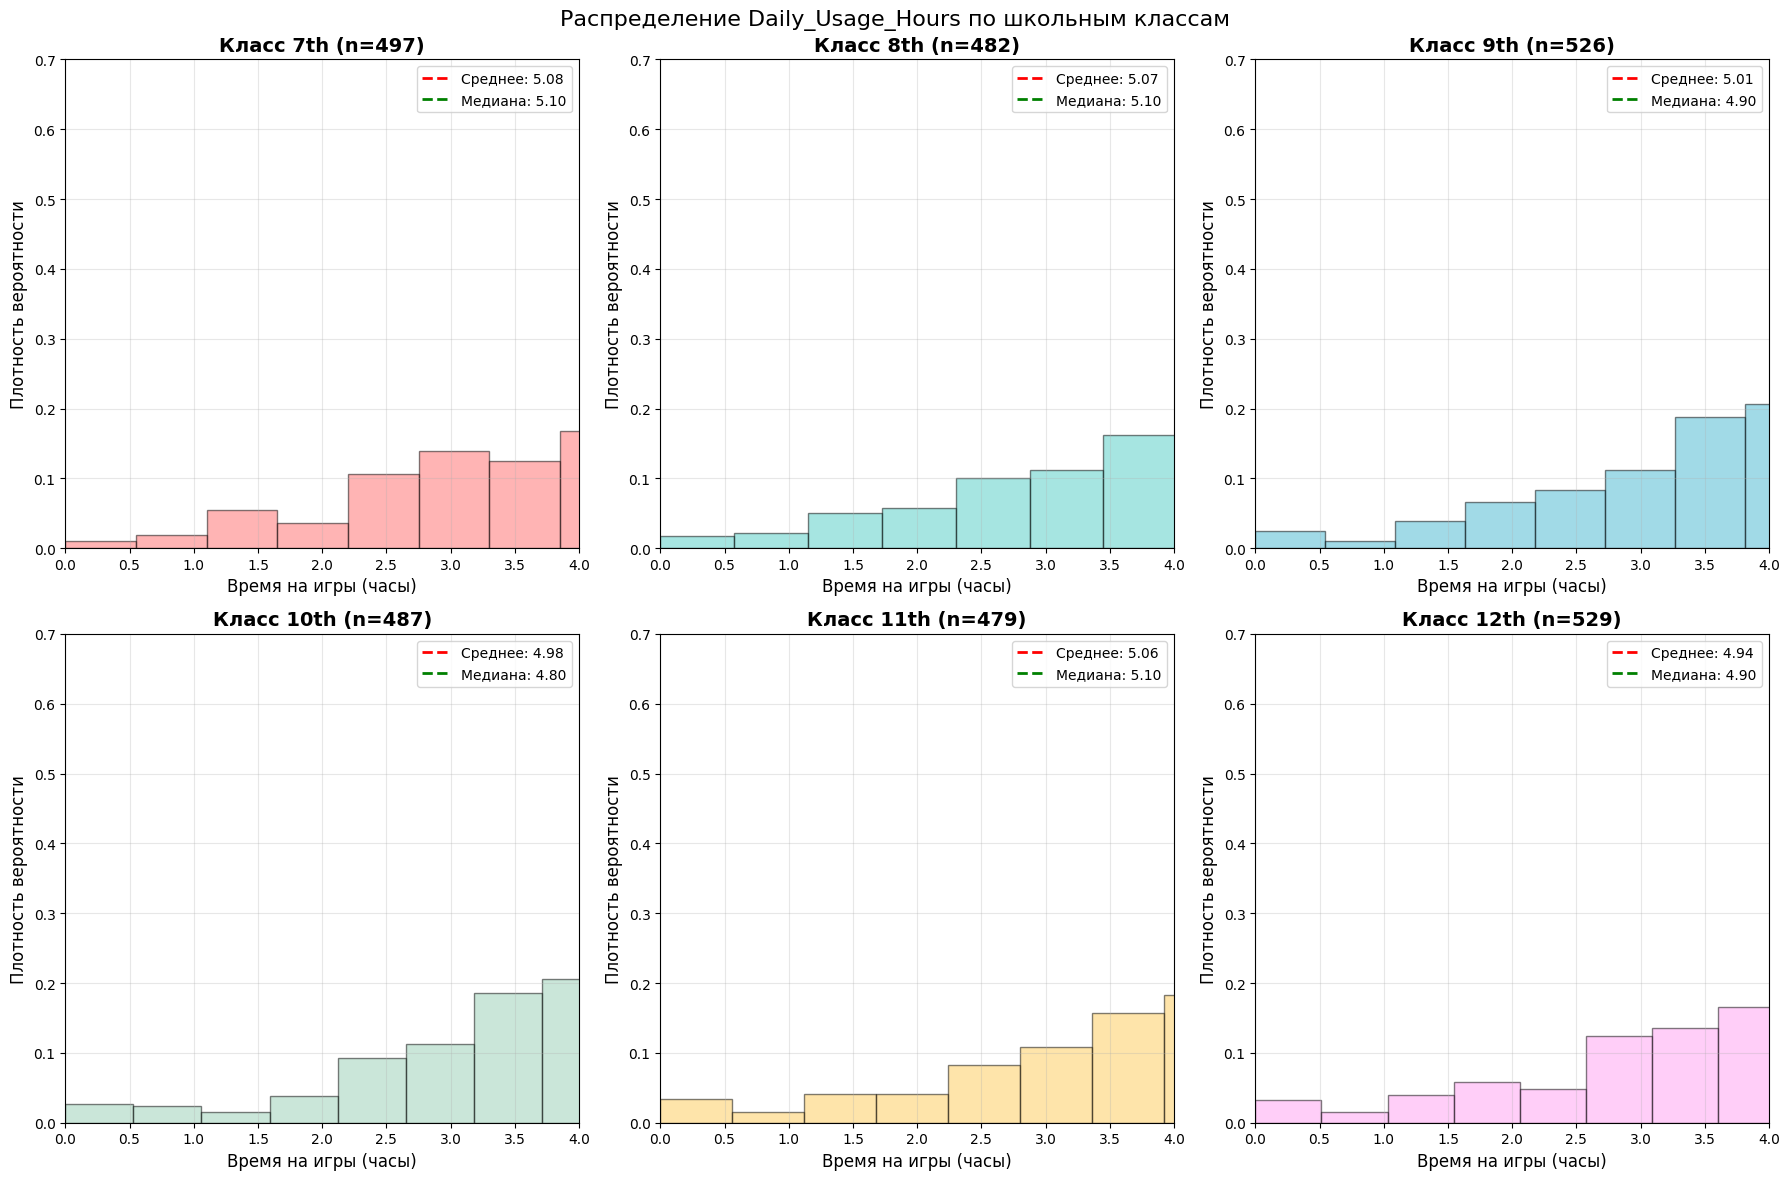

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
df = pd.read_csv('teen_phone_addiction_dataset.csv')

# Правильная сортировка классов (от младших к старшим)
correct_order = ['7th', '8th', '9th', '10th', '11th', '12th']

# Группировка с правильной сортировкой
grouped = df.groupby('School_Grade')['Daily_Usage_Hours']
grades = correct_order

# Цвета для каждого класса
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', '#FF9FF3']

# Создание subplot с сеткой 2x3
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Построение отдельных гистограмм для каждого класса
for i, grade in enumerate(grades):
    grade_data = grouped.get_group(grade)
    
    # Построение гистограммы
    axes[i].hist(grade_data, bins=20, alpha=0.5, color=colors[i], 
                edgecolor='black', density=True)
    
    # Расчет статистик
    mean_val = grade_data.mean()
    median_val = grade_data.median()
    
    # Добавление линий среднего и медианы
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, 
                   label=f'Среднее: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2,
                   label=f'Медиана: {median_val:.2f}')
    
    # Настройка subplot
    axes[i].set_title(f'Класс {grade} (n={len(grade_data)})', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Время на игры (часы)', fontsize=12)
    axes[i].set_ylabel('Плотность вероятности', fontsize=12)
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim(0, 4)
    axes[i].set_ylim(0, 0.7)
    axes[i].legend(fontsize=10)

# Удаляем пустые subplots если классов меньше 6
for i in range(len(grades), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Распределение Daily_Usage_Hours по школьным классам', 
             fontsize=16, y=0.98)
plt.tight_layout()
plt.show()